# Plot Filter Throughput

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : September 25th   2022
- last update : September 25th2022


### 

- **kernel anaconda3_auxtel** at CC or **python 3** locally

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
! ls spectractor_tables

BG40.txt  FELH0600.txt	quadnotch1.txt	RG610.txt


In [4]:
path="spectractor_tables"
filename_filterblue = "BG40.txt"
filename_filterred = "FELH0600.txt"

In [5]:
arr1=np.loadtxt(os.path.join(path,filename_filterblue))
arr2=np.loadtxt(os.path.join(path,filename_filterred))

In [6]:
wl1 = arr1[:,0]
tr1 = arr1[:,1]

In [7]:
wl2 = arr2[:,0]
tr2 = arr2[:,1]

# Plot

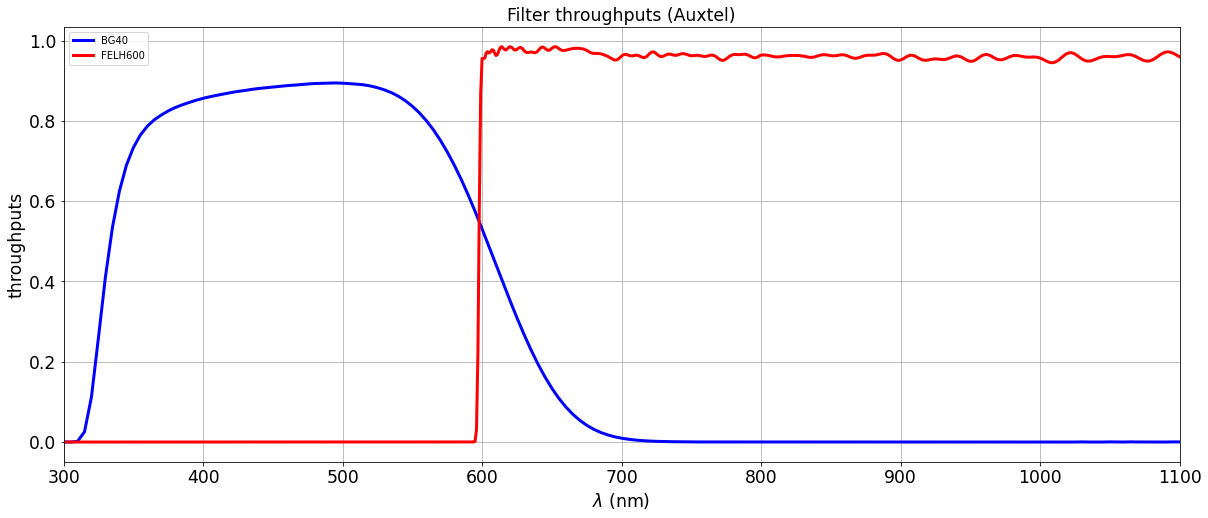

In [8]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,tr1,'b-',label="BG40",lw=3)
ax.plot(wl2,tr2,'r-',label="FELH600",lw=3)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Filter throughputs (Auxtel)")
ax.grid()
ax.set_ylabel("throughputs")
ax.set_xlim(300,1100)
plt.savefig("auxtel_filter_throughputs_linscale.png")
plt.show()

# Smoothing of the filter red filter

In [15]:
from scipy.signal import savgol_filter
tr2_smo = savgol_filter(tr2, 51, 5) # window size 51, polynomial order 3

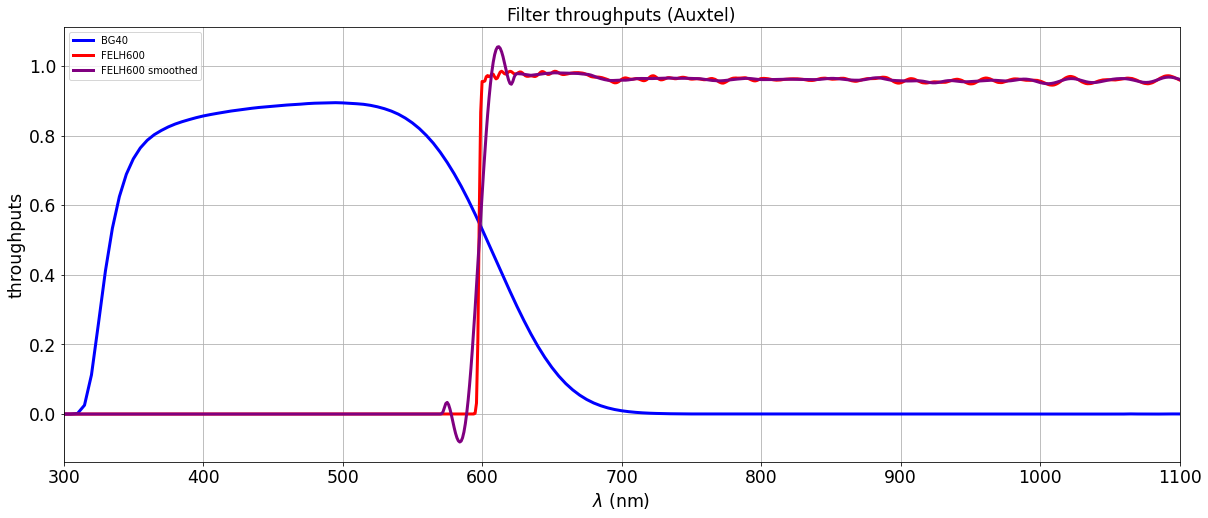

In [16]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(1,1,1)

ax.plot(wl1,tr1,'b-',label="BG40",lw=3)
ax.plot(wl2,tr2,'r-',label="FELH600",lw=3)
ax.plot(wl2,tr2_smo,'-',color="purple",label="FELH600 smoothed",lw=3)
ax.legend()
ax.set_xlabel("$\lambda$ (nm)")
ax.set_title("Filter throughputs (Auxtel)")
ax.grid()
ax.set_ylabel("throughputs")
ax.set_xlim(300,1100)
plt.savefig("auxtel_filter_throughputs_smooth_linscale.png")
plt.show()